### => IMPORT LIBRARIES - PANDAS, NUMPY & MATPLOTLIB

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### => LOAD FASHION_MNIST DATA FROM TENSORFLOW

In [2]:
from tensorflow.keras.datasets import fashion_mnist

### => SPLITTING THE ORIGINAL DATA INTO TRAINING DATA & TESTING DATA

In [3]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
print(y_train[:10])
print(list(set(y_train)))

[9 0 0 3 0 2 7 2 5 5]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


<br>0. T-shirt/top </br>
<br>1. Trouser </br>
<br>2. Pullover </br>
<br>3. Dress </br>
<br>4. Coat </br>
<br>5. Sandal </br>
<br>6. Shirt </br>
<br>7. Sneaker </br>
<br>8. Bag </br>
<br>9. Ankle boot </br>

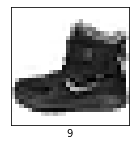

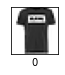

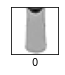

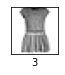

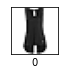

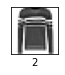

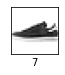

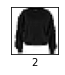

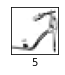

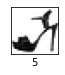

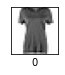

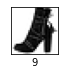

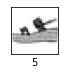

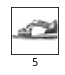

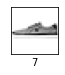

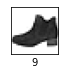

In [5]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i],cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
    plt.show()

### => PREPROCESSING STEP FOR REDUCING THE TRAINING & TESTING DATA

In [6]:
x_train = x_train[:5000,:,:]
x_test = x_test[:1000,:,:]
y_train = y_train[:5000]
y_test = y_test[:1000]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5000, 28, 28)
(1000, 28, 28)
(5000,)
(1000,)


In [7]:
print(x_train[46])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   5   0   0   0   1   1   

### =>NOW NORMALIZING...

In [8]:
x_train = x_train/255
x_test = x_test/255

### => THEN RESHAPING...

In [9]:
x_train = x_train.reshape(5000,28,28,1)
x_test = x_test.reshape(1000,28,28,1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5000, 28, 28, 1)
(1000, 28, 28, 1)
(5000,)
(1000,)


### => IMPORT SEQUENTIAL,DENSE,FLATTEN,CONV2D,MAXPOOLING2D,ADAM FROM TENSORFLOW

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

### => NOW BUILT CNN ARCHITECTURE

In [11]:
m1 = Sequential()
m1.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
m1.add(MaxPooling2D(pool_size=(2,2)))

m1.add(Conv2D(32,(3,3),activation='relu'))
m1.add(MaxPooling2D(pool_size=(2,2)))

m1.add(Flatten())
m1.add(Dense(128,activation='relu'))
m1.add(Dense(10,activation='softmax'))

m1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### => NOW EXECUTING IT FOR APPROPRIATE NUMBER OF EPOCHS.

In [12]:
h1 = m1.fit(x_train,y_train,epochs=6,validation_data=(x_test,y_test))

Epoch 1/6
157/157 [==============================] - 5s 26ms/step - loss: 0.8892 - accuracy: 0.6746 - val_loss: 0.6735 - val_accuracy: 0.7370
Epoch 2/6
157/157 [==============================] - 4s 24ms/step - loss: 0.5396 - accuracy: 0.8008 - val_loss: 0.5585 - val_accuracy: 0.7960
Epoch 3/6
157/157 [==============================] - 4s 24ms/step - loss: 0.4454 - accuracy: 0.8450 - val_loss: 0.5523 - val_accuracy: 0.8120
Epoch 4/6
157/157 [==============================] - 4s 25ms/step - loss: 0.4146 - accuracy: 0.8550 - val_loss: 0.4376 - val_accuracy: 0.8400
Epoch 5/6
157/157 [==============================] - 4s 25ms/step - loss: 0.3625 - accuracy: 0.8696 - val_loss: 0.4318 - val_accuracy: 0.8490
Epoch 6/6
157/157 [==============================] - 4s 24ms/step - loss: 0.3376 - accuracy: 0.8802 - val_loss: 0.4736 - val_accuracy: 0.8370


In [13]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
1,0.539647,0.8008,0.558466,0.796,1
2,0.445443,0.8450,0.552280,0.812,2
3,0.414631,0.8550,0.437638,0.840,3
4,0.362515,0.8696,0.431798,0.849,4
5,0.337629,0.8802,0.473614,0.837,5


### => HERE IS THE PLOT GRAPH BETWEEN LOSS & VAL_LOSS.

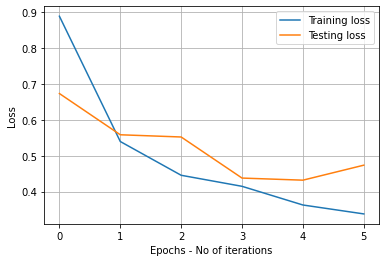

In [14]:
plt.plot(r1['Epochs'],r1['loss'],label='Training loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Testing loss')
plt.xlabel('Epochs - No of iterations')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

### => NOW PLOT THE GRAPH BETWEEN ACCURACY & VAL_ACCURACY.

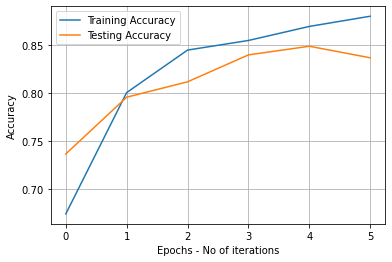

In [15]:
plt.plot(r1['Epochs'],r1['accuracy'],label='Training Accuracy')
plt.plot(r1['Epochs'],r1['val_accuracy'],label='Testing Accuracy')
plt.xlabel('Epochs - No of iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

### => HERE PREDICTION ON TEST_DATA

In [16]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

[[1.74070974e-05 1.28100407e-06 8.01230635e-05 ... 6.89296499e-02
  6.49668090e-03 8.36855769e-01]
 [8.67308408e-04 3.12690318e-09 9.43830013e-01 ... 3.76531784e-09
  4.75042580e-05 2.20058638e-07]
 [8.11248128e-07 9.99998808e-01 2.82967427e-08 ... 3.61369323e-10
  3.91606960e-07 1.28456967e-12]
 ...
 [7.16651499e-04 2.45833817e-05 1.32484958e-01 ... 1.76503920e-06
  2.40629562e-03 2.74348829e-04]
 [6.75889605e-04 3.69594964e-05 1.15687224e-04 ... 9.02781010e-01
  1.75098376e-03 8.96845246e-04]
 [8.80180778e-06 1.88531786e-07 1.38004452e-06 ... 9.99109685e-01
  1.54894169e-05 1.45556105e-05]]


In [17]:
print(sum(ypred_m1[0]))
print(sum(ypred_m1[330]))
print(sum(ypred_m1[893]))

1.0000000342496378
0.9999999850842869
1.000000008328243


In [18]:
ypred_m2 = [np.argmax(i) for i in ypred_m1]
print(ypred_m2)

[9, 2, 1, 1, 6, 1, 6, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 6, 8, 0, 2, 7, 7, 5, 1, 6, 6, 0, 9, 4, 8, 8, 1, 6, 8, 0, 7, 5, 7, 9, 6, 1, 6, 9, 6, 7, 6, 1, 4, 6, 6, 6, 5, 6, 2, 2, 8, 6, 8, 0, 7, 7, 8, 5, 1, 1, 6, 3, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 6, 5, 1, 6, 7, 1, 8, 0, 1, 2, 2, 3, 6, 7, 2, 7, 8, 5, 9, 9, 4, 2, 5, 7, 0, 5, 2, 8, 4, 7, 8, 0, 0, 9, 9, 3, 0, 8, 4, 1, 5, 4, 1, 9, 1, 8, 6, 6, 1, 2, 5, 1, 0, 0, 0, 1, 6, 1, 3, 2, 2, 6, 4, 1, 4, 5, 6, 4, 7, 9, 3, 7, 2, 3, 9, 0, 9, 2, 7, 4, 2, 0, 5, 4, 1, 2, 1, 3, 6, 9, 1, 0, 9, 3, 6, 7, 9, 9, 4, 4, 7, 1, 2, 1, 6, 3, 6, 8, 3, 6, 1, 1, 0, 2, 9, 2, 6, 0, 7, 9, 8, 4, 1, 6, 4, 1, 3, 1, 6, 7, 2, 8, 5, 6, 0, 7, 7, 6, 2, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 2, 5, 6, 9, 2, 2, 8, 6, 6, 6, 2, 9, 7, 6, 5, 5, 6, 8, 5, 6, 3, 0, 4, 8, 0, 0, 6, 6, 6, 9, 0, 1, 3, 0, 2, 3, 0, 8, 3, 7, 4, 0, 1, 6, 3, 0, 6, 6, 7, 5, 3, 5, 9, 5, 6, 5, 5, 1, 9, 8, 8, 3, 3, 6, 8, 0, 0, 2, 9, 5, 7, 1, 3, 2, 6, 2, 4, 7, 1, 6, 2, 0, 2, 6, 5, 6, 6, 7, 7, 7, 3, 3, 7, 6, 

### =>FINAL STEP: CONFUSION MATRIX & CLASSIFICATION REPORT

In [19]:
from sklearn.metrics import confusion_matrix,classification_report

In [20]:
cm_m1 = confusion_matrix(y_test,ypred_m2)
print(cm_m1)
print(classification_report(y_test,ypred_m2))

[[ 87   0   3   0   0   1  15   0   1   0]
 [  1 102   0   1   0   0   1   0   0   0]
 [  2   0  81   0   7   0  21   0   0   0]
 [  6   4   1  68   1   0  12   0   1   0]
 [  0   0   8   2  78   1  26   0   0   0]
 [  0   0   0   0   0  85   0   2   0   0]
 [ 10   0   5   2   3   0  77   0   0   0]
 [  0   0   0   0   0   7   0  86   0   2]
 [  2   0   1   0   0   1   6   0  85   0]
 [  0   0   0   0   0   2   0   5   0  88]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       107
           1       0.96      0.97      0.97       105
           2       0.82      0.73      0.77       111
           3       0.93      0.73      0.82        93
           4       0.88      0.68      0.76       115
           5       0.88      0.98      0.92        87
           6       0.49      0.79      0.60        97
           7       0.92      0.91      0.91        95
           8       0.98      0.89      0.93        95
           9       0.98     